# WeatherPy

## Analysis

In [120]:
# import dependencies
from citipy import citipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import openweathermapy as owm
from config import api_key
import requests
import seaborn as sns
from datetime import datetime
# set the style
sns.set_style("darkgrid")
tick_size, label_size,title_size = 15, 15, 20
# current date
created_on = datetime.today().strftime("%m/%d/%Y")

### Generate Cities List

In [133]:
random_pool_count = 1200
# random latitudes
lat_north = np.random.rand(1,random_pool_count)*90
lat_south = np.random.rand(1,random_pool_count)*(-90)
lats = lat_north + lat_south

# random longtitudes
long_east = np.random.rand(1,random_pool_count)*180
long_west = np.random.rand(1,random_pool_count)*(-180)
longs = long_east + long_west

stacked_locs = np.dstack((lats, longs))

# generate cities list by citipy
cities_locs = stacked_locs[0]
cities = [citipy.nearest_city(lat, long).city_name for lat, long in cities_locs]

# get the unique cities
cities = set(cities)


In [134]:
# unique cities
print(f"The number of unique countries: {len(cities)}")

The number of unique countries: 673


### Perform API Calls

#### Approach #1 - by using Openweathermap wrapper

In [201]:
settings = {"units":"Imperial", "APPID": api_key}
city_data_pd = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed'])

# make the request
for city_index, city_name in enumerate(cities):
    # create the url even though the wrapper does not need it
    url = owm.BASE_URL + 'weather?' + 'units={units}&APPID={APPID}&q={city_name}'
    query_url = url.format(city_name=city_name, **settings)
    
    # print the log
    print(f"Processing Record {city_num+1} | {city_name} \n{query_url}")

    # get the data
    data = owm.get_current(city_name,**settings)
    
    

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=oltu


#### Approach #1 - by using requests

In [123]:
# settings = {"units":"Imperial", "APPID": api_key}
units = "Imperial"

# create an empty dataframe
# and initalize the columns with empty strings
city_data_pd = pd.DataFrame()
city_data_pd['City'] = ''
city_data_pd['Cloudiness'] = ''
city_data_pd['Country'] = ''
city_data_pd['Date'] = ''
city_data_pd['Humidity'] = ''
city_data_pd['Lat'] = ''
city_data_pd['Lng'] = ''
city_data_pd['Max Temp'] = ''
city_data_pd['Wind Speed'] = ''

# iterate over the cities and make restful api calls
for city_num, city_name in enumerate(cities):
    # make the api call to the query url
    query_url = f"http://api.openweathermap.org/data/2.5/weather?units={units}&APPID={api_key}&q={city_name}"
    resp = requests.get(query_url)
    status_code = resp.status_code
    url = resp.url
    
    # print the log 
    print(f"Processing Record {city_num+1} | {city_name} \n{url}")
    
    # check on the response status code
    if status_code == 200:
        # jsonify the response
        content = resp.json()
        # populate the dataframe
        city_data_pd.loc[city_num, 'City'] = city_name
        city_data_pd.loc[city_num, 'Cloudiness'] = content.get('clouds').get('all')
        city_data_pd.loc[city_num, 'Country'] = content.get('sys').get('country')
        city_data_pd.loc[city_num, 'Date'] = content.get('dt')
        city_data_pd.loc[city_num, 'Humidity'] = content.get('main').get('humidity')
        city_data_pd.loc[city_num, 'Lat'] = content.get('coord').get('lat')
        city_data_pd.loc[city_num, 'Lng'] = content.get('coord').get('lon')
        city_data_pd.loc[city_num, 'Max Temp'] = content.get('main').get('temp_max')
        city_data_pd.loc[city_num, 'Wind Speed'] = content.get('wind').get('speed')
    else:
        print("Failed to get the response!! Remote server is not reachable.")


Processing Record 1 | gogapur 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=gogapur
Processing Record 2 | lagos 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=lagos
Processing Record 3 | ostrovnoy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ostrovnoy
Processing Record 4 | luba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=luba
Processing Record 5 | agde 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=agde
Processing Record 6 | saint-louis 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=saint-louis
Processing Record 7 | longyearbyen 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=longyearbyen


Processing Record 56 | mao 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mao
Processing Record 57 | pemba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=pemba
Processing Record 58 | teguise 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=teguise
Processing Record 59 | faya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=faya
Processing Record 60 | bonavista 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bonavista
Processing Record 61 | calvinia 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=calvinia
Processing Record 62 | fereydun kenar 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=fereydun%20k

Processing Record 111 | natal 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=natal
Processing Record 112 | nyimba 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nyimba
Processing Record 113 | pitkyaranta 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=pitkyaranta
Processing Record 114 | barao de melgaco 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=barao%20de%20melgaco
Processing Record 115 | auki 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=auki
Processing Record 116 | port pirie 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port%20pirie
Processing Record 117 | jiwani 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9

Processing Record 166 | betare oya 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=betare%20oya
Processing Record 167 | grand river south east 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=grand%20river%20south%20east
Failed to get the response!! Remote server is not reachable.
Processing Record 168 | chalons-en-champagne 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=chalons-en-champagne
Processing Record 169 | raga 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=raga
Failed to get the response!! Remote server is not reachable.
Processing Record 170 | marzuq 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=marzuq
Processing Record 171 | abnub 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 217 | north platte 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=north%20platte
Processing Record 218 | torbat-e jam 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=torbat-e%20jam
Processing Record 219 | abalak 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=abalak
Processing Record 220 | karatau 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=karatau
Processing Record 221 | riyadh 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=riyadh
Processing Record 222 | namibe 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=namibe
Processing Record 223 | valenza 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f

Processing Record 273 | inderborskiy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=inderborskiy
Failed to get the response!! Remote server is not reachable.
Processing Record 274 | castro 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=castro
Processing Record 275 | san patricio 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=san%20patricio
Processing Record 276 | nanortalik 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=nanortalik
Processing Record 277 | iquique 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=iquique
Processing Record 278 | bam 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bam
Processing Record 279 | ndele 
http://api.openweathermap.

Processing Record 326 | berekua 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=berekua
Processing Record 327 | port hedland 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port%20hedland
Processing Record 328 | parkersburg 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=parkersburg
Processing Record 329 | kuito 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kuito
Processing Record 330 | hami 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=hami
Processing Record 331 | magaria 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=magaria
Processing Record 332 | hashtrud 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9d

Processing Record 382 | belmonte 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=belmonte
Processing Record 383 | jalu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=jalu
Processing Record 384 | amudat 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=amudat
Processing Record 385 | matara 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=matara
Processing Record 386 | illoqqortoormiut 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=illoqqortoormiut
Failed to get the response!! Remote server is not reachable.
Processing Record 387 | amderma 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=amderma
Failed to get the response!! Remote server is not reachable.
Proc

Processing Record 436 | mgandu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mgandu
Processing Record 437 | deming 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=deming
Processing Record 438 | itarema 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=itarema
Processing Record 439 | wolgast 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=wolgast
Processing Record 440 | olga 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=olga
Processing Record 441 | novokizhinginsk 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=novokizhinginsk
Processing Record 442 | surt 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e

Processing Record 491 | ibra 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=ibra
Processing Record 492 | aden 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=aden
Processing Record 493 | gonbad-e qabus 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=gonbad-e%20qabus
Processing Record 494 | inhambane 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=inhambane
Processing Record 495 | east london 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=east%20london
Processing Record 496 | lishui 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=lishui
Processing Record 497 | wittingen 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f

Processing Record 545 | lusambo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=lusambo
Processing Record 546 | bentiu 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bentiu
Failed to get the response!! Remote server is not reachable.
Processing Record 547 | port-gentil 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=port-gentil
Processing Record 548 | westport 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=westport
Processing Record 549 | bako 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bako
Processing Record 550 | kaspiyskiy 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=kaspiyskiy
Processing Record 551 | bubaque 
http://api.openweathermap.org/data

Processing Record 599 | sa kaeo 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=sa%20kaeo
Processing Record 600 | jangaon 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=jangaon
Processing Record 601 | bom jesus 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=bom%20jesus
Processing Record 602 | mwanza 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=mwanza
Processing Record 603 | abu zabad 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=abu%20zabad
Processing Record 604 | panjab 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f4233c9ddb29c49e&q=panjab
Processing Record 605 | san cristobal 
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f3353447a9945c51f42

In [124]:
# Statistics of the city data frame
city_data_pd.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [125]:
# drop the nan's
city_data_pd = city_data_pd.dropna()
city_data_pd.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [126]:
# Visualize the city data frame
city_data_pd.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,gogapur,0,IN,1527132730,40,23.55,75.52,89.09,15.68
1,lagos,20,NG,1527130800,83,6.46,3.39,80.6,6.17
2,ostrovnoy,88,RU,1527132730,89,68.05,39.51,35.72,17.25
3,luba,8,PH,1527132731,70,17.32,120.7,86.39,3.71
4,agde,90,FR,1527130800,93,43.31,3.47,60.8,5.82
5,saint-louis,56,CH,1527132000,100,47.59,7.56,59,2.93
6,longyearbyen,88,NO,1527132731,96,78.22,15.63,32.66,2.37
7,kapaa,20,US,1527130560,78,22.08,-159.32,77,19.46
8,san isidro,8,PH,1527132734,94,16.74,121.63,84.77,2.71
9,salvaterra de magos,0,PT,1527130800,82,39.02,-8.79,60.8,4.7


In [127]:
# Save the retrieved data to a csv file
city_data_pd.to_csv("city_data.csv", index=False)

In [128]:
# Convert the data type of certain columns to float and int types
city_data_converted_pd = city_data_pd[['Lat','Max Temp','Wind Speed']].astype(float)
city_data_converted_pd[['Cloudiness','Humidity']] = city_data_pd[['Cloudiness','Humidity']].astype(int)

### Latitude vs Temperature Plot 

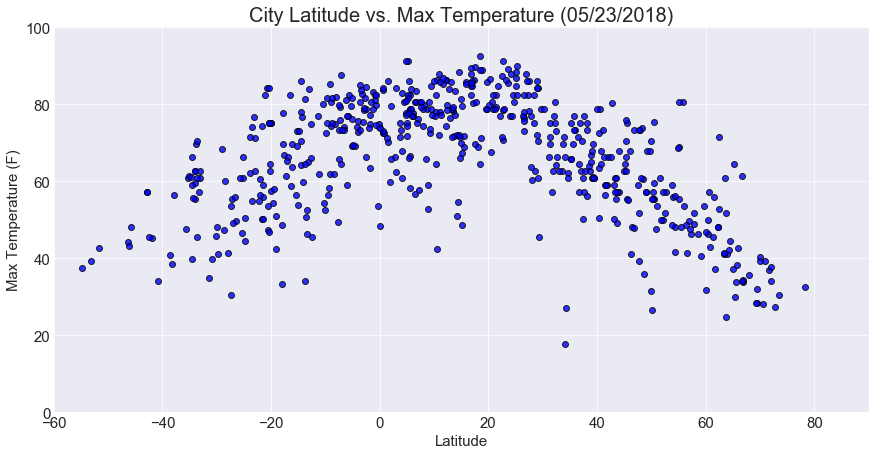

In [129]:
# creat the plot by seaborn
sns.lmplot(x='Lat', y='Max Temp',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                           'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Max Temperature ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Max Temperature (F)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# x and y limits
plt.xlim(-60,90)
plt.ylim(0, 100)
plt.show()

### Latitude vs. Humidity Plot

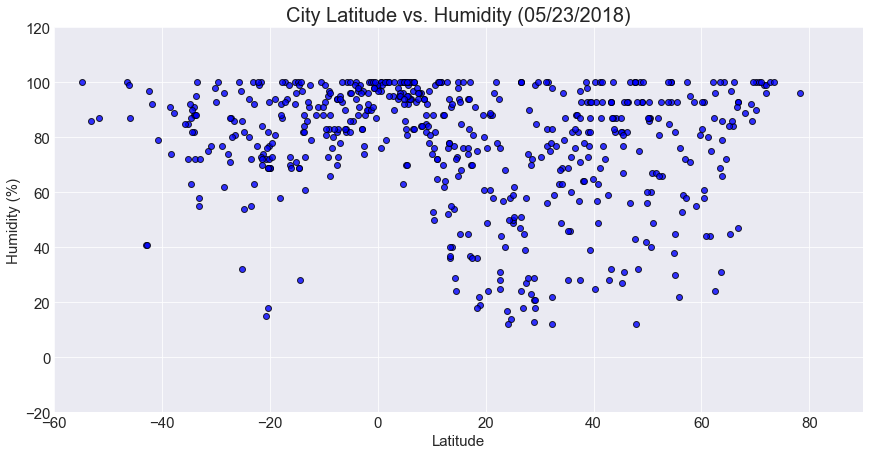

In [130]:
# create the plot by seaborn
sns.lmplot(x='Lat', y='Humidity',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Humidity ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Humidity (%)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# x and y limits
plt.xlim(-60,90)
plt.ylim(-20, 120)
plt.show()

### Latitude vs. Cloudiness Plot

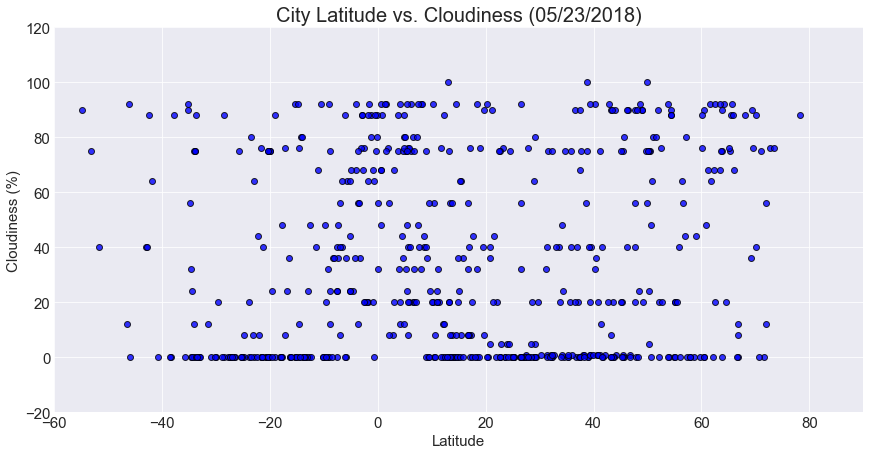

In [131]:
# create the plot
sns.lmplot(x='Lat', y='Cloudiness',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Cloudiness ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Cloudiness (%)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# x and y limits
plt.xlim(-60,90)
plt.ylim(-20, 120)
plt.show()

### Latitude vs. Wind Speed Plot

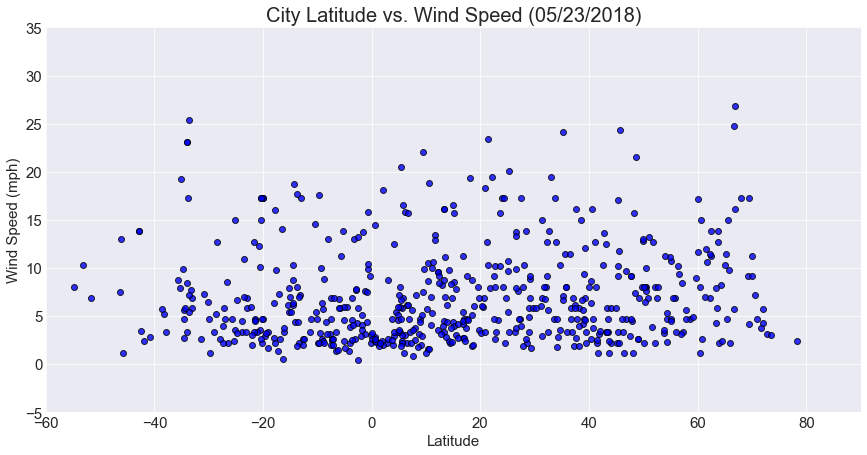

In [132]:
# create the plot
sns.lmplot(x='Lat', y='Wind Speed',data=city_data_converted_pd, fit_reg=False, markers='o',
            scatter_kws={'edgecolors':'black',
                        'color': 'blue'},
            size=6,
            aspect=2)

# title and labels
plt.title("City Latitude vs. Wind Speed ({date})".format(date=created_on), fontsize=title_size)
plt.xlabel("Latitude", fontsize=label_size)
plt.ylabel("Wind Speed (mph)", fontsize=label_size)
# ticks size
plt.xticks(fontsize=tick_size)
plt.yticks(fontsize=tick_size)
# x and y limits
plt.xlim(-60,90)
plt.ylim(-5, 35)
plt.show()